In [1]:
import pandas as pd
import numpy as np


In [2]:
path_train ="/content/drive/My Drive/house_price_data/train.csv" 
path_test = "/content/drive/My Drive/house_price_data/test.csv"
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

df_train

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

In [3]:
df_test

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [6]:
df_train.describe(include=['object'])

MSZoning Street Alley LotShape  ...  Fence MiscFeature SaleType SaleCondition
count      1460   1460    91     1460  ...    281          54     1460          1460
unique        5      2     2        4  ...      4           4        9             6
top          RL   Pave  Grvl      Reg  ...  MnPrv        Shed       WD        Normal
freq       1151   1454    50      925  ...    157          49     1267          1198

[4 rows x 43 columns]

In [7]:
cat_clm = df_train.select_dtypes(include=['object']).columns

In [8]:
for clm in cat_clm:
    print(30*'*')
    values = df_train[clm].value_counts()
    print(values)


******************************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
******************************
Pave    1454
Grvl       6
Name: Street, dtype: int64
******************************
Grvl    50
Pave    41
Name: Alley, dtype: int64
******************************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
******************************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
******************************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
******************************
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
******************************
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
******************************
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NW

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

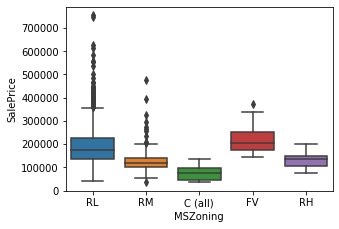

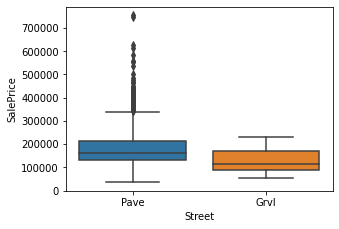

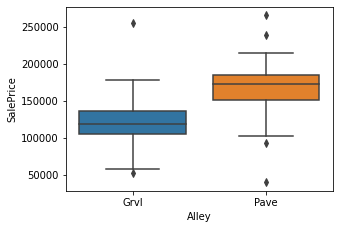

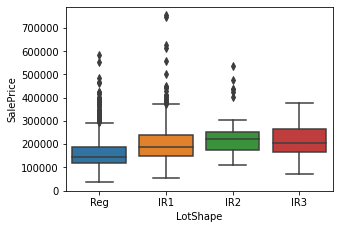

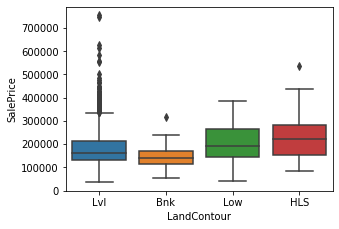

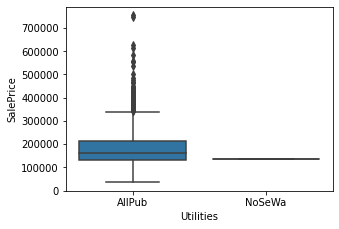

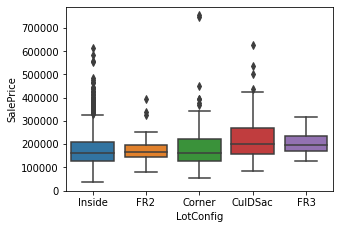

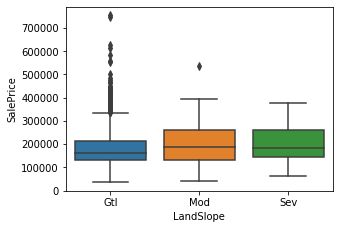

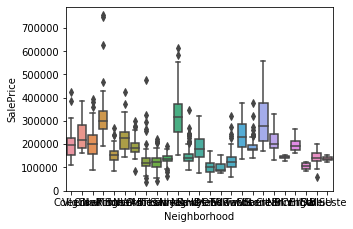

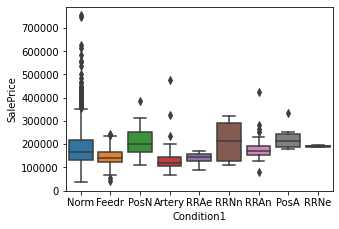

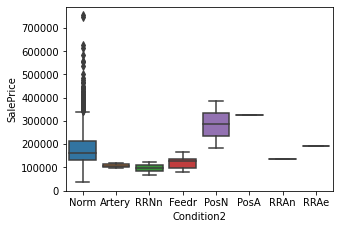

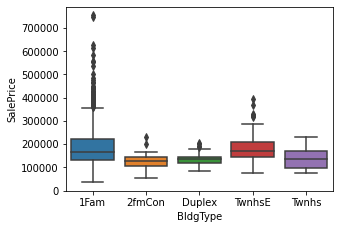

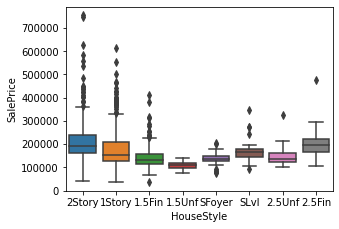

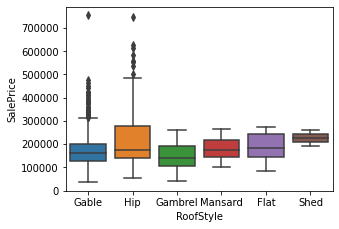

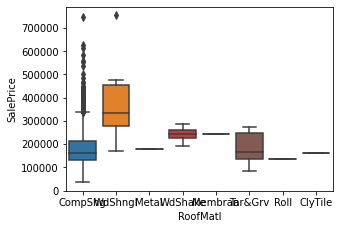

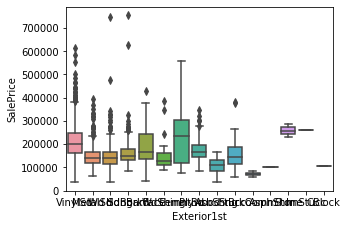

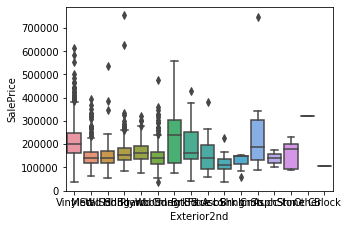

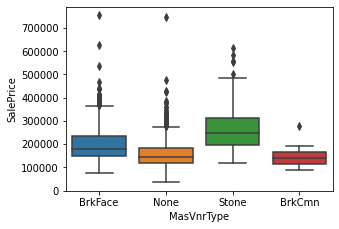

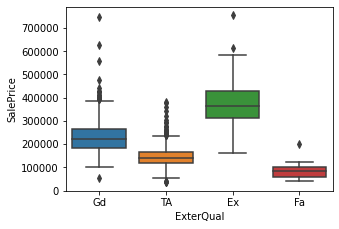

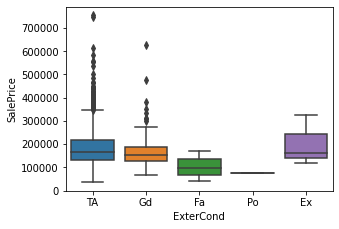

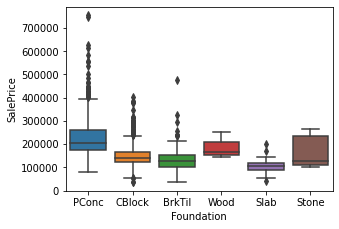

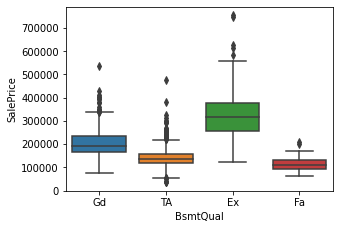

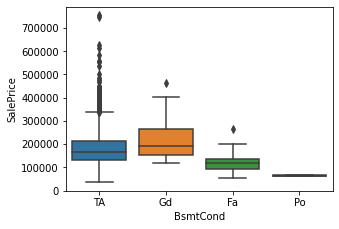

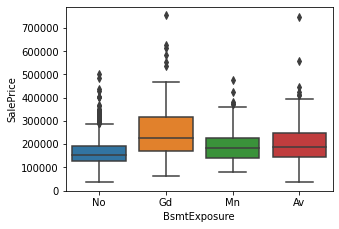

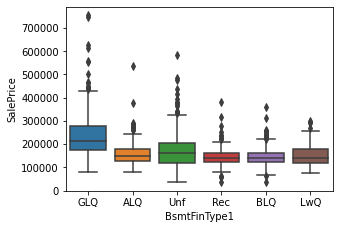

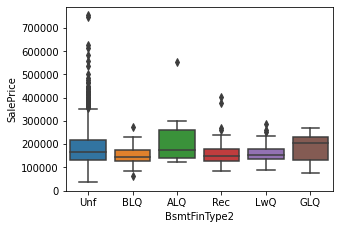

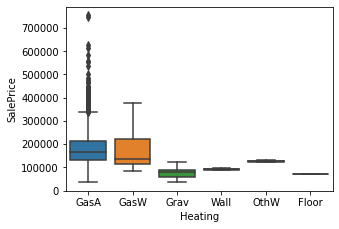

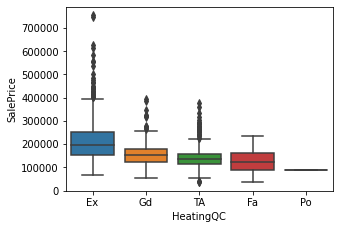

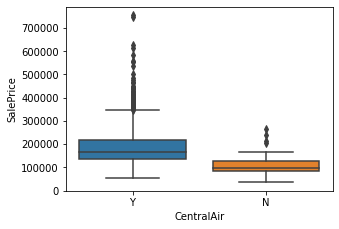

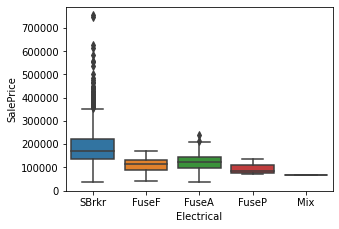

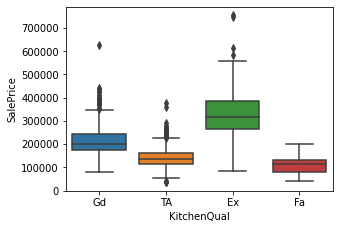

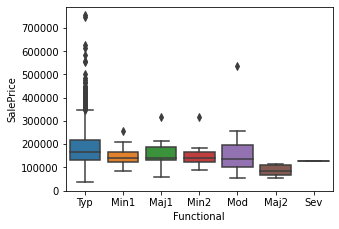

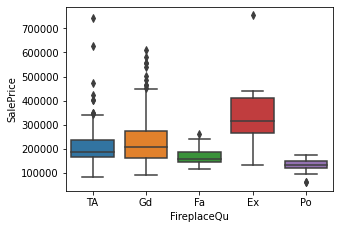

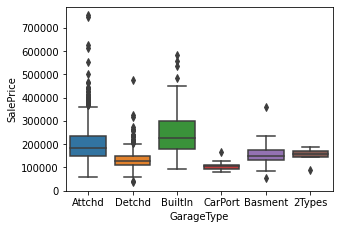

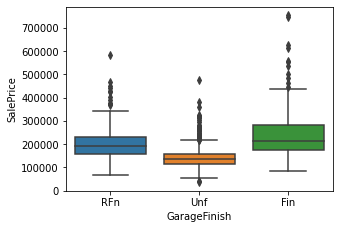

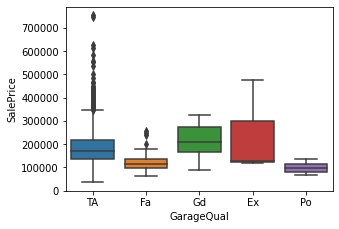

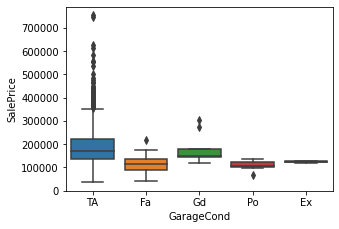

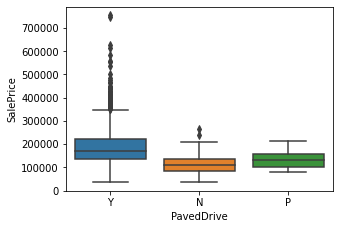

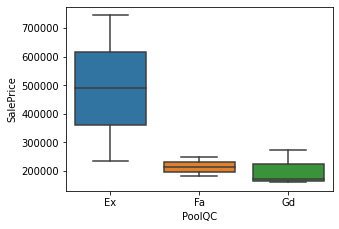

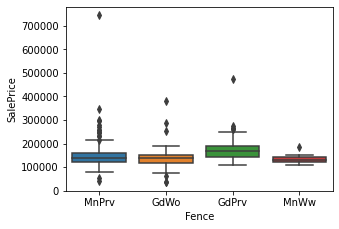

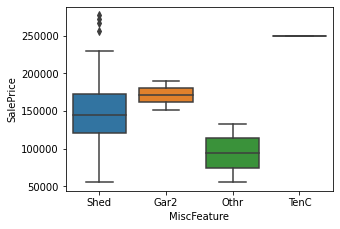

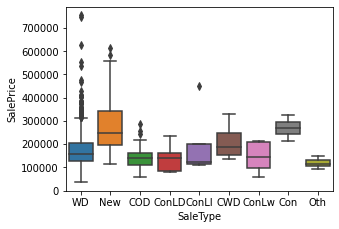

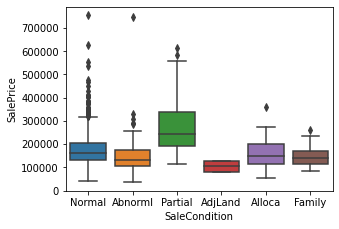

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
for i,cat in enumerate(cat_clm):
   plt.figure(figsize=(22,44))
   plt.subplot(11,4,i+1)
   
   sns.boxplot(x=df_train[cat],y=df_train['SalePrice'])
    


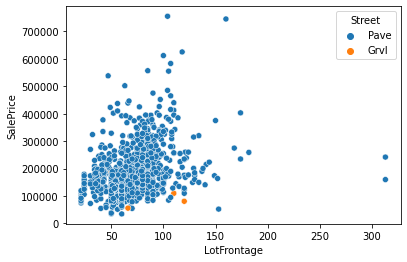

In [10]:
sns.scatterplot(x='LotFrontage',y='SalePrice',hue='Street',data=df_train)

In [11]:
df_train.corr()

Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
Id             1.000000    0.011156    -0.010601  ...  0.021172  0.000712  -0.021917
MSSubClass     0.011156    1.000000    -0.386347  ... -0.013585 -0.021407  -0.084284
LotFrontage   -0.010601   -0.386347     1.000000  ...  0.011200  0.007450   0.351799
LotArea       -0.033226   -0.139781     0.426095  ...  0.001205 -0.014261   0.263843
OverallQual   -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
OverallCond    0.012609   -0.059316    -0.059213  ... -0.003511  0.043950  -0.077856
YearBuilt     -0.012713    0.027850     0.123349  ...  0.012398 -0.013618   0.522897
YearRemodAdd  -0.021998    0.040581     0.088866  ...  0.021490  0.035743   0.507101
MasVnrArea    -0.050298    0.022936     0.193458  ... -0.005965 -0.008201   0.477493
BsmtFinSF1    -0.005024   -0.069836     0.233633  ... -0.015727  0.014359   0.386420
BsmtFinSF2    -0.005968   -0.065649     0.049900  ... -0.015211  0.031706  -0.011378
BsmtUnfSF     -0.007940   -0.140759     0.132644  ...  0.034888 -0.041258   0.214479
TotalBsmtSF   -0.015415   -0.238518     0.392075  ...  0.013196 -0.014969   0.613581
1stFlrSF       0.010496   -0.251758     0.457181  ...  0.031372 -0.013604   0.605852
2ndFlrSF       0.005590    0.307886     0.080177  ...  0.035164 -0.028700   0.319334
LowQualFinSF  -0.044230    0.046474     0.038469  ... -0.022174 -0.028921  -0.025606
GrLivArea      0.008273    0.074853     0.402797  ...  0.050240 -0.036526   0.708624
BsmtFullBath   0.002289    0.003491     0.100949  ... -0.025361  0.067049   0.227122
BsmtHalfBath  -0.020155   -0.002333    -0.007234  ...  0.032873 -0.046524  -0.016844
FullBath       0.005587    0.131608     0.198769  ...  0.055872 -0.019669   0.560664
HalfBath       0.006784    0.177354     0.053532  ... -0.009050 -0.010269   0.284108
BedroomAbvGr   0.037719   -0.023438     0.263170  ...  0.046544 -0.036014   0.168213
KitchenAbvGr   0.002951    0.281721    -0.006069  ...  0.026589  0.031687  -0.135907
TotRmsAbvGrd   0.027239    0.040380     0.352096  ...  0.036907 -0.034516   0.533723
Fireplaces    -0.019772   -0.045569     0.266639  ...  0.046357 -0.024096   0.466929
GarageYrBlt    0.000072    0.085072     0.070250  ...  0.005337 -0.001014   0.486362
GarageCars     0.016570   -0.040110     0.285691  ...  0.040522 -0.039117   0.640409
GarageArea     0.017634   -0.098672     0.344997  ...  0.027974 -0.027378   0.623431
WoodDeckSF    -0.029643   -0.012579     0.088521  ...  0.021011  0.022270   0.324413
OpenPorchSF   -0.000477   -0.006100     0.151972  ...  0.071255 -0.057619   0.315856
EnclosedPorch  0.002889   -0.012037     0.010700  ... -0.028887 -0.009916  -0.128578
3SsnPorch     -0.046635   -0.043825     0.070029  ...  0.029474  0.018645   0.044584
ScreenPorch    0.001330   -0.026030     0.041383  ...  0.023217  0.010694   0.111447
PoolArea       0.057044    0.008283     0.206167  ... -0.033737 -0.059689   0.092404
MiscVal       -0.006242   -0.007683     0.003368  ... -0.006495  0.004906  -0.021190
MoSold         0.021172   -0.013585     0.011200  ...  1.000000 -0.145721   0.046432
YrSold         0.000712   -0.021407     0.007450  ... -0.145721  1.000000  -0.028923
SalePrice     -0.021917   -0.084284     0.351799  ...  0.046432 -0.028923   1.000000

[38 rows x 38 columns]

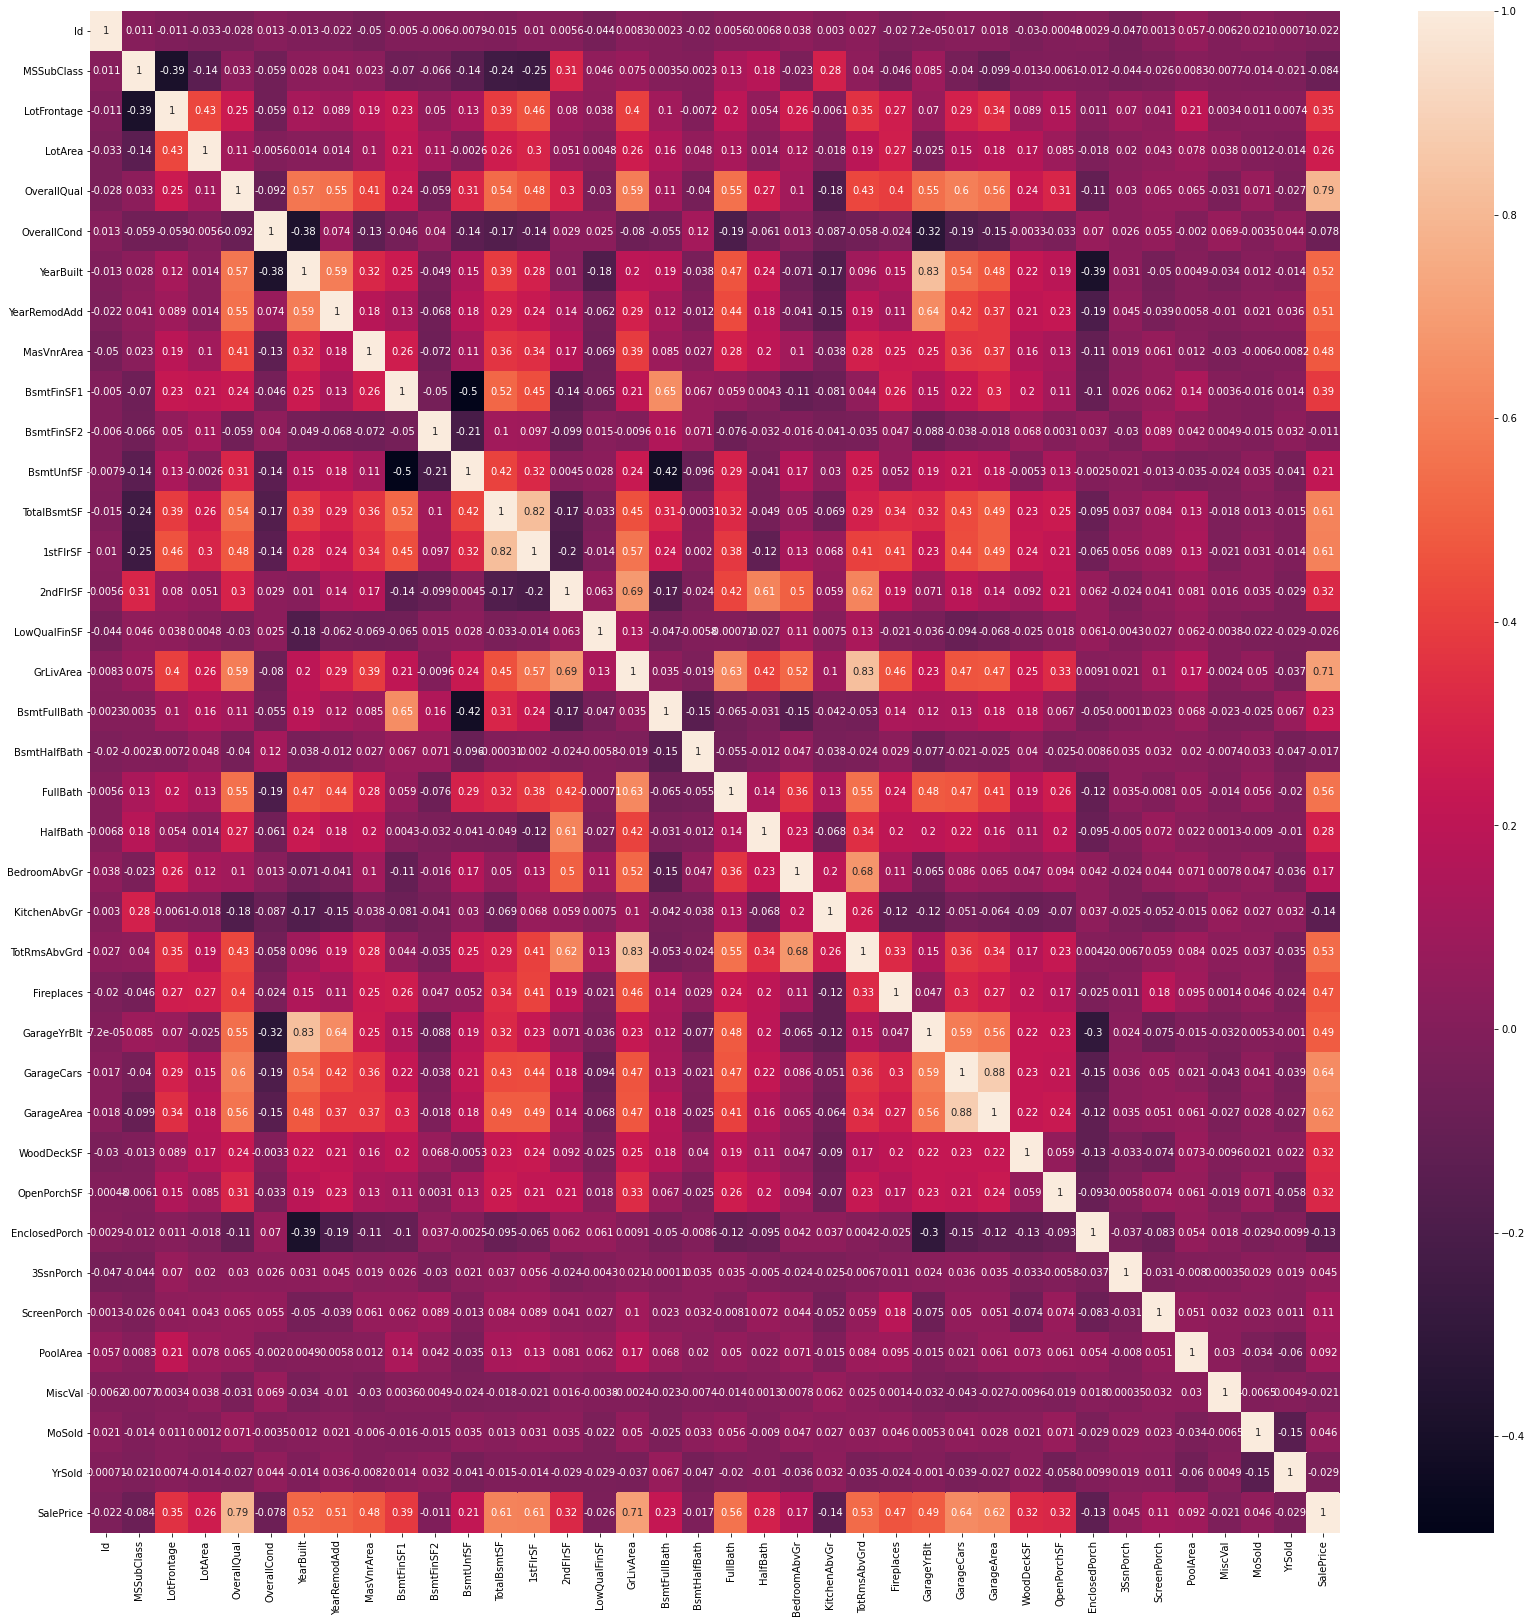

In [12]:
plt.figure(figsize=(28,28))
sns.heatmap(df_train.corr(),annot=True)


In [13]:
corr_var = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']

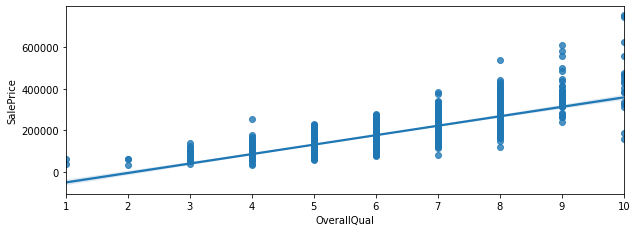

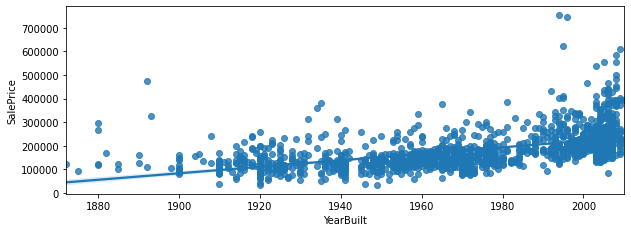

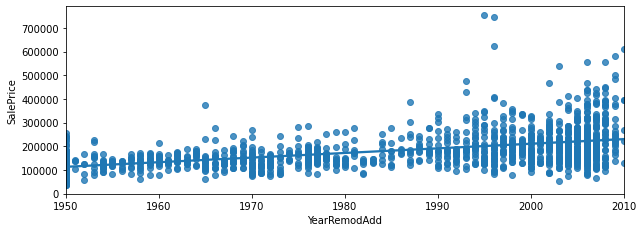

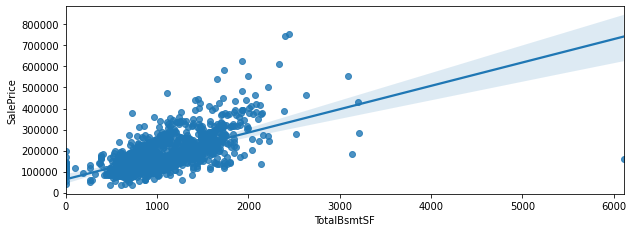

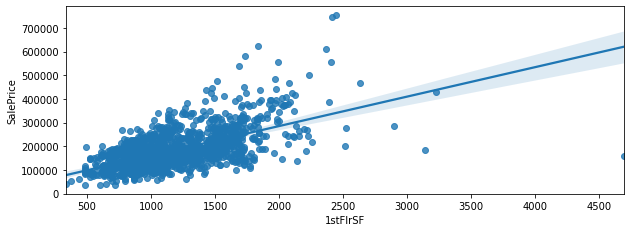

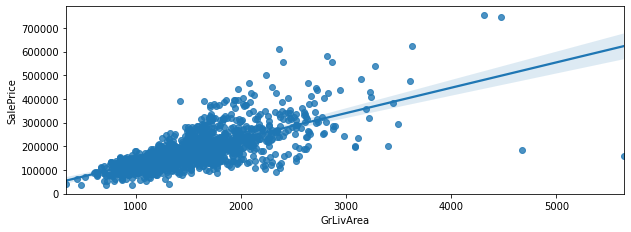

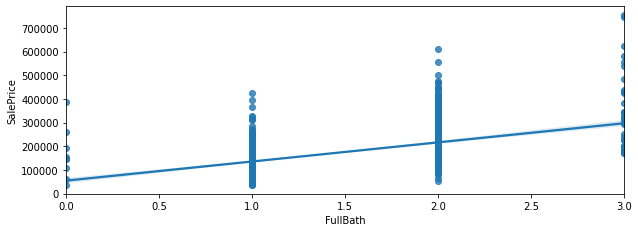

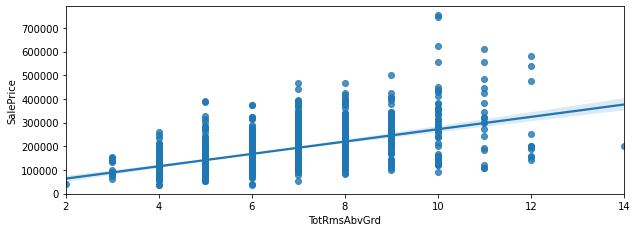

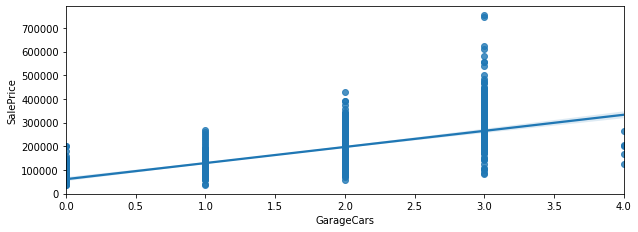

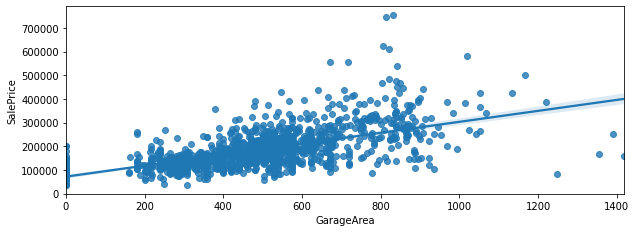

In [14]:
for i,var in enumerate(corr_var):
  plt.figure(figsize=(22,20))
  plt.subplot(5,2,i+1)
  sns.regplot(x=df_train[var],y=df_train['SalePrice'])

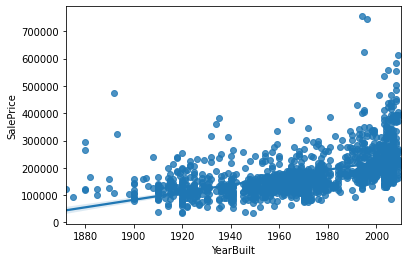

In [15]:
sns.regplot(x='YearBuilt',y='SalePrice',data=df_train)

In [16]:
from sklearn.model_selection import train_test_split
X = df_train[corr_var]
y = df_train['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error

models =[LinearRegression(),Ridge(),Lasso()]
models_name=['LinearRegression','Ridge','Lasso']

for i,model in enumerate(models):
  lr = model
  lr.fit(X_train,y_train)
  prediction = lr.predict(X_test)
  mse = mean_squared_error(prediction,y_test)
  score = lr.score(X_test,y_test)
  rmse = np.sqrt(mse)
  print("score of ",models_name[i],': ',score)
  print("meansqureerror of ",models_name[i],':',mse)
  print("root_mean_sqr_error ",models_name[i],':',rmse)



score of  LinearRegression :  0.7350618423882705
meansqureerror of  LinearRegression : 1349656481.6192348
root_mean_sqr_error  LinearRegression : 36737.67115127516
score of  Ridge :  0.7351818567487535
meansqureerror of  Ridge : 1349045100.6049883
root_mean_sqr_error  Ridge : 36729.34930821656
score of  Lasso :  0.7350738658035976
meansqureerror of  Lasso : 1349595231.5502615
root_mean_sqr_error  Lasso : 36736.83752788557


Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_tr = poly.fit_transform(X_train)
X_poly_te = poly.fit_transform(X_test)
X_poly_tr.shape


(1168, 66)

In [19]:
lr = LinearRegression()
lr.fit(X_poly_tr,y_train)
prediction = lr.predict(X_poly_te)
print(lr.score(X_poly_te,y_test))
print(mean_squared_error(y_test,prediction))


0.6279705119100087
1895204580.874283


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc =  sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [21]:
X_train_sc

array([[ 0.65789431,  1.15793274,  1.04259765, ...,  1.52095742,
         1.63739278,  2.20525673],
       [-0.7770647 , -0.36336351,  1.04259765, ...,  1.52095742,
         0.30558584, -0.63944477],
       [-0.0595852 ,  1.09178943,  0.94536402, ..., -2.165957  ,
         0.30558584, -0.24835651],
       ...,
       [ 0.65789431, -0.09879025,  0.3619622 , ...,  0.90647168,
         0.30558584,  0.06358293],
       [ 0.65789431,  1.15793274,  1.04259765, ..., -0.93698553,
         1.63739278,  1.64190341],
       [-0.7770647 , -0.33029186, -0.07558916, ..., -0.32249979,
        -1.0262211 , -0.97466328]])

In [22]:
X_test_sc

array([[ 1.37537381,  1.1910044 ,  1.09121447, ...,  0.29198595,
         0.30558584,  0.48726188],
       [ 1.37537381,  1.1910044 ,  1.09121447, ...,  0.29198595,
         0.30558584,  0.43604794],
       [-0.7770647 , -0.56179346,  0.75089675, ..., -1.55147127,
        -1.0262211 , -0.6860029 ],
       ...,
       [ 0.65789431,  1.09178943,  0.94536402, ...,  0.29198595,
         0.30558584, -0.43458901],
       [-2.21202371, -1.6200865 , -1.67994416, ..., -0.32249979,
        -1.0262211 , -1.22607716],
       [-0.0595852 ,  0.19885467,  0.79951356, ..., -0.32249979,
         0.30558584,  0.03099225]])

In [23]:
X_train_sc = pd.DataFrame(X_train_sc,columns=corr_var)
X_test_sc = pd.DataFrame(X_test_sc,columns=corr_var)

In [24]:
X_train_sc.head()

OverallQual  YearBuilt  YearRemodAdd  ...  TotRmsAbvGrd  GarageCars  GarageArea
0     0.657894   1.157933      1.042598  ...      1.520957    1.637393    2.205257
1    -0.777065  -0.363364      1.042598  ...      1.520957    0.305586   -0.639445
2    -0.059585   1.091789      0.945364  ...     -2.165957    0.305586   -0.248357
3    -0.777065  -0.264149     -1.047926  ...     -0.322500   -1.026221   -0.639445
4    -0.777065   0.198855     -0.367290  ...      0.291986    0.305586    0.687462

[5 rows x 10 columns]

In [25]:
X_train_sc.describe().round(2)

OverallQual  YearBuilt  ...  GarageCars  GarageArea
count      1168.00    1168.00  ...     1168.00     1168.00
mean         -0.00       0.00  ...        0.00       -0.00
std           1.00       1.00  ...        1.00        1.00
min          -3.65      -3.17  ...       -2.36       -2.20
25%          -0.78      -0.57  ...       -1.03       -0.64
50%          -0.06       0.05  ...        0.31        0.02
75%           0.66       0.96  ...        0.31        0.48
max           2.81       1.29  ...        2.97        4.40

[8 rows x 10 columns]

In [26]:
models =[LinearRegression(),Ridge(),Lasso()]
models_name=['LinearRegression','Ridge','Lasso']

for i,model in enumerate(models):
  lr = model
  lr.fit(X_train_sc,y_train)
  prediction = lr.predict(X_test_sc)
  mse = mean_squared_error(prediction,y_test)
  score = lr.score(X_test_sc,y_test)
  rmse = np.sqrt(mse)
  print("score of ",models_name[i],': ',score)
  print("meansqureerror of ",models_name[i],':',mse)
  print("root_mean_sqr_error ",models_name[i],':',rmse)

score of  LinearRegression :  0.7350618423882705
meansqureerror of  LinearRegression : 1349656481.6192348
root_mean_sqr_error  LinearRegression : 36737.67115127516
score of  Ridge :  0.7353246621239198
meansqureerror of  Ridge : 1348317616.8708947
root_mean_sqr_error  Ridge : 36719.444669968725
score of  Lasso :  0.7350905610441363
meansqureerror of  Lasso : 1349510182.119072
root_mean_sqr_error  Lasso : 36735.67995993911


In [27]:
poly = PolynomialFeatures(degree=2)
X_poly_tr = poly.fit_transform(X_train_sc)
X_poly_te = poly.fit_transform(X_test_sc)
X_poly_tr.shape


(1168, 66)

In [28]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [29]:
lr = LinearRegression()
lr.fit(X_poly_tr,y_train)
prediction = lr.predict(X_poly_te)
print(lr.score(X_poly_te,y_test))
print(mean_squared_error(y_test,prediction))


0.6279705119207394
1895204580.819619


In [30]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [31]:
df_train_mean = df_train.isnull().sum()/df_train.shape[0]*100

In [32]:
drop_clm = df_train_mean[df_train_mean>17].keys()

In [33]:
drop_clm

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [34]:
df_train.drop(columns=drop_clm,inplace=True)

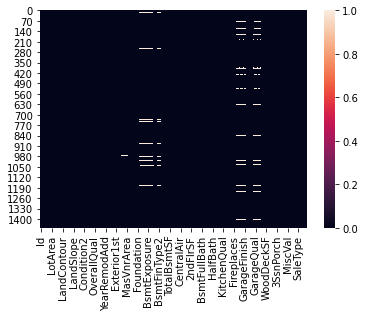

In [35]:
sns.heatmap(df_train.isnull())

In [36]:
fill_clm = df_train_mean[df_train_mean>0].keys()
#for clm in drop_clm:
  #df_train[clm].fillna(df_train[clm].mean())
fill_clm = ['MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical',  'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 
       ]

In [37]:
fill_clm_cat = df_train[fill_clm].select_dtypes(include=['object'])

In [38]:
fill_clm = ['MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical',  'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'
       ]

In [39]:
fill_clm_cat = df_train[fill_clm].select_dtypes(include=['object']).keys()
fill_clm_cat

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [40]:
for clm in fill_clm_cat:
  df_train[clm] = df_train[clm].fillna(df_train[clm].value_counts().index[0])



In [41]:
df_train[fill_clm_cat].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [42]:
fill_clm_num = df_train[fill_clm].select_dtypes(exclude=['object']).keys()
fill_clm_num

Index(['MasVnrArea', 'GarageYrBlt'], dtype='object')

In [43]:
for clm in fill_clm_num:
  df_train[clm] = df_train[clm].fillna(df_train[clm].mean())

In [44]:
df_train[fill_clm_num].isnull().sum()

MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [45]:
df_train.isnull().sum().sum()

0

In [46]:
cat_var = df_train.select_dtypes(include=['object']).keys()
cat_var

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

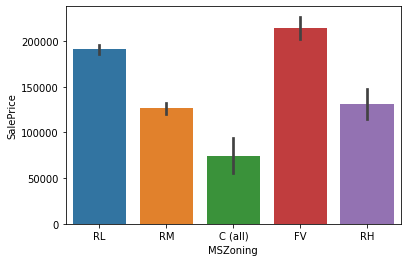

In [47]:
sns.barplot(x='MSZoning',y='SalePrice',data=df_train)

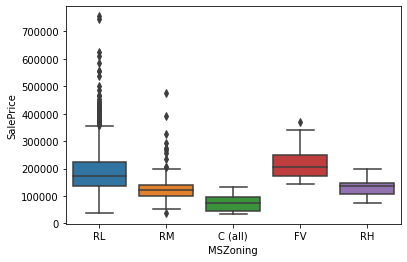

In [48]:
sns.boxplot(x=df_train['MSZoning'],y=df_train['SalePrice'])

In [49]:
grp_anova = df_train[['MSZoning','SalePrice']].groupby(['MSZoning'])

In [50]:
from scipy import stats
f_val,p_val = stats.f_oneway(grp_anova.get_group('RL')['SalePrice'],grp_anova.get_group('RM')['SalePrice'])
print("F_val : ",f_val,"_val : ",p_val)

F_val :  130.85017881595033 _val :  5.311474332770575e-29


In [51]:
f_val,p_val = stats.f_oneway(grp_anova.get_group('RL')['SalePrice'],grp_anova.get_group('C (all)')['SalePrice'])
print("F_val : ",f_val,"_val : ",p_val)

F_val :  20.751699089333616 _val :  5.7813714684311394e-06


In [52]:
f_val,p_val = stats.f_oneway(grp_anova.get_group('RL')['SalePrice'],grp_anova.get_group('FV')['SalePrice'])
print("F_val : ",f_val,"_val : ",p_val)

F_val :  5.150726947005251 _val :  0.02341143797546856


In [53]:
f_val,p_val = stats.f_oneway(grp_anova.get_group('RL')['SalePrice'],grp_anova.get_group('RH')['SalePrice'])
print("F_val : ",f_val,"_val : ",p_val)

F_val :  8.638529492627015 _val :  0.0033561549774501448


In [54]:
f_val,p_val = stats.f_oneway(grp_anova.get_group('RM')['SalePrice'],grp_anova.get_group('C (all)')['SalePrice'])
print("F_val : ",f_val,"_val : ",p_val)

F_val :  11.12043252010755 _val :  0.0009978227378512018


In [55]:
f_val,p_val = stats.f_oneway(grp_anova.get_group('RM')['SalePrice'],grp_anova.get_group('FV')['SalePrice'])
print("F_val : ",f_val,"_val : ",p_val)

F_val :  157.64184014149694 _val :  5.290552561341394e-29


In [56]:
cat_val = ['RL', 'RM', 'FV', 'RH', 'C (all)']

In [57]:
def findAnova(catag_val,depended_var):
    for cat in catag_val:
      print("*"*40)
      for val in catag_val:
        if(cat==val):
          continue
        f_val,p_val = stats.f_oneway(grp_anova.get_group(cat)[depended_var],grp_anova.get_group(val)[depended_var])
        print("F_val{} : ".format(cat),f_val,"P_val {} : ".format(val),p_val)

In [58]:
findAnova(cat_val,'SalePrice')

****************************************
F_valRL :  130.85017881595033 P_val RM :  5.311474332770575e-29
F_valRL :  5.150726947005251 P_val FV :  0.02341143797546856
F_valRL :  8.638529492627015 P_val RH :  0.0033561549774501448
F_valRL :  20.751699089333616 P_val C (all) :  5.7813714684311394e-06
****************************************
F_valRM :  130.85017881595033 P_val RL :  5.311474332770575e-29
F_valRM :  157.64184014149694 P_val FV :  5.290552561341394e-29
F_valRM :  0.17925401608721694 P_val RH :  0.6724073389418679
F_valRM :  11.12043252010755 P_val C (all) :  0.0009978227378512018
****************************************
F_valFV :  5.15072694700525 P_val RL :  0.02341143797546856
F_valFV :  157.64184014149694 P_val RM :  5.290552561341394e-29
F_valFV :  35.427872262455836 P_val RH :  6.908191265720095e-08
F_valFV :  66.25013379633258 P_val C (all) :  7.703220225844867e-12
****************************************
F_valRH :  8.638529492627015 P_val RL :  0.0033561549774501448
F

In [59]:
cat_val = df_train['Street'].value_counts()
cat_val

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [60]:
for var in cat_var:
    cat_val = df_train[var].value_counts()
    print('-_'*50)
    print(cat_val)

-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Pave    1454
Grvl       6
Name: Street, dtype: int64
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Inside     1052
Cor

Catagorical Feature ***Encoding***

In [61]:
df_train[cat_var]

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave      IR2         Lvl    AllPub    Inside       Gtl   
13         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
14         RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
15         RM   Pave      Reg         Lvl    AllPub    Corner       Gtl   
16         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
17         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
18         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
19         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
21         RM   Pave      Reg         Bnk    AllPub    Inside       Gtl   
22         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
23         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
24         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
25         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
26         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
27         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
28         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
29         RM   Pave      IR1         Lvl    AllPub    Inside       Gtl   
30    C (all)   Pave      Reg         Lvl    AllPub    Inside       Gtl   
31         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
32         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
33         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
34         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
35         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
36         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
37         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
38         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
39         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
40         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
41         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
42         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
43         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
44         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
45         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
46         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
47         FV   Pave      Reg         Lvl    AllPub    Inside       Gtl   
48         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
49         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
50         RL   Pave      IR2         Lvl    AllPub    Corner       Gtl   
51         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
52         RM   Grvl      IR2 

In [62]:
df_ohe = pd.get_dummies(df_train[cat_var],drop_first=True,)

In [63]:
df_ohe.shape

(1460, 196)

In [64]:
X = df_ohe
y = df_train['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [65]:
models =[LinearRegression(),Ridge(),Lasso()]
models_name=['LinearRegression','Ridge','Lasso']

for i,model in enumerate(models):
  lr = model
  lr.fit(X_train,y_train)
  prediction = lr.predict(X_test)
  mse = mean_squared_error(prediction,y_test)
  score = lr.score(X_test,y_test)
  rmse = np.sqrt(mse)
  print("score of ",models_name[i],': ',score)
  print("meansqureerror of ",models_name[i],':',mse)
  print("root_mean_sqr_error ",models_name[i],':',rmse)

score of  LinearRegression :  -1.1994090640987858e+22
meansqureerror of  LinearRegression : 6.088357457716229e+31
root_mean_sqr_error  LinearRegression : 7802792742163685.0
score of  Ridge :  0.7746429359889557
meansqureerror of  Ridge : 1143941964.747125
root_mean_sqr_error  Ridge : 33822.211115583865
score of  Lasso :  0.7195582279802941
meansqureerror of  Lasso : 1423559155.2864099
root_mean_sqr_error  Lasso : 37730.08289530265


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2965386759.2108154, tolerance: 770506884.218319
  positive)


In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_tr = poly.fit_transform(X_train)
X_poly_te = poly.fit_transform(X_test)
X_poly_tr.shape

(1168, 19503)

In [67]:
for i,model in enumerate(models):
  lr = model
  lr.fit(X_poly_tr,y_train)
  prediction = lr.predict(X_poly_te)
  mse = mean_squared_error(prediction,y_test)
  score = lr.score(X_poly_te,y_test)
  rmse = np.sqrt(mse)
  print("score of ",models_name[i],': ',score)
  print("meansqureerror of ",models_name[i],':',mse)
  print("root_mean_sqr_error ",models_name[i],':',rmse)

score of  LinearRegression :  -1.191925536549061e+20
meansqureerror of  LinearRegression : 6.050370091994904e+29
root_mean_sqr_error  LinearRegression : 777841249355863.4
score of  Ridge :  0.6592069040780915
meansqureerror of  Ridge : 1729910377.702017
root_mean_sqr_error  Ridge : 41592.191306806824
score of  Lasso :  0.50092475626878
meansqureerror of  Lasso : 2533371285.14668
root_mean_sqr_error  Lasso : 50332.60658009557


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17559791934.45368, tolerance: 770506884.218319
  positive)


In [68]:
corr_var = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']

In [69]:
base_df = df_train[corr_var]
full_df = base_df.join(df_ohe)

In [70]:
full_df.head()

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            7       2003          2003          856       856       1710   
1            6       1976          1976         1262      1262       1262   
2            7       2001          2002          920       920       1786   
3            7       1915          1970          756       961       1717   
4            8       2000          2000         1145      1145       2198   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  MSZoning_FV  MSZoning_RH  \
0         2             8           2         548            0            0   
1         2             6           2         460            0            0   
2         2             6           2         608            0            0   
3         1             7           3         642            0            0   
4         2             9           3         836            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   
3            1            0            1             0             0   
4            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_

In [71]:
X = full_df
y = df_train['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [72]:
for i,model in enumerate(models):
  lr = model
  lr.fit(X_train,y_train)
  prediction = lr.predict(X_test)
  mse = mean_squared_error(prediction,y_test)
  score = lr.score(X_test,y_test)
  rmse = np.sqrt(mse)
  print("score of ",models_name[i],': ',score)
  print("meansqureerror of ",models_name[i],':',mse)
  print("root_mean_sqr_error ",models_name[i],':',rmse)

score of  LinearRegression :  0.7457573051259099
meansqureerror of  LinearRegression : 1893075070.183435
root_mean_sqr_error  LinearRegression : 43509.482531781905
score of  Ridge :  0.7631305951356504
meansqureerror of  Ridge : 1763714648.5563967
root_mean_sqr_error  Ridge : 41996.602821614
score of  Lasso :  0.7497534371206103
meansqureerror of  Lasso : 1863320123.3989215
root_mean_sqr_error  Lasso : 43166.191902910796


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214930197717.2793, tolerance: 702679440.1566188
  positive)


In [73]:
poly = PolynomialFeatures(degree=2)
X_poly_tr = poly.fit_transform(X_train)
X_poly_te = poly.fit_transform(X_test)
X_poly_tr.shape

(1168, 21528)

In [74]:
for i,model in enumerate(models):
  lr = model
  lr.fit(X_poly_tr,y_train)
  prediction = lr.predict(X_poly_te)
  mse = mean_squared_error(prediction,y_test)
  score = lr.score(X_poly_te,y_test)
  rmse = np.sqrt(mse)
  print("score of ",models_name[i],': ',score)
  print("meansqureerror of ",models_name[i],':',mse)
  print("root_mean_sqr_error ",models_name[i],':',rmse)

score of  LinearRegression :  -33.98693401495238
meansqureerror of  LinearRegression : 260510503944.50867
root_mean_sqr_error  LinearRegression : 510402.29617871885


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.68518e-18): result may not be accurate.
  overwrite_a=False)


score of  Ridge :  -35.2789670197702
meansqureerror of  Ridge : 270130900205.98672
root_mean_sqr_error  Ridge : 519741.18578960694
score of  Lasso :  0.3881808884661564
meansqureerror of  Lasso : 4555566515.215268
root_mean_sqr_error  Lasso : 67494.93695985846


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8981379501.079561, tolerance: 702679440.1566188
  positive)
